In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Data Collection

In [19]:
# CO2 Emissions Dataset 
Co2 = pd.read_csv("/Users/madisonfusaro/Desktop/School/MATH 358/emissions.csv")
Co2.rename(columns={"state-name": "state"}, inplace=True)

# Filtering data
Co2_2020 = Co2[
    (Co2["year"] == 2020) &
    (Co2["fuel-name"] == "All Fuels") &
    (Co2["sector-name"] == "Total carbon dioxide emissions from all sectors") &
    (Co2["state"] != "United States") &
    (Co2["state"] != "District of Columbia")
].copy()

# Rename value column to be co2_emissions
Co2_2020.rename(columns = {"value" : "co2_emissions"}, inplace=True)

Co2_2020.head()

,year,state,sector-name,fuel-name,co2_emissions
57756,2020,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,98.431803
57778,2020,Alaska,Total carbon dioxide emissions from all sectors,All Fuels,35.977743
57786,2020,Arizona,Total carbon dioxide emissions from all sectors,All Fuels,80.153897
57820,2020,Arkansas,Total carbon dioxide emissions from all sectors,All Fuels,54.749619
57828,2020,California,Total carbon dioxide emissions from all sectors,All Fuels,303.815453


In [20]:
# Election's Dataset 
election = pd.read_csv("/Users/madisonfusaro/Desktop/School/MATH 358/election_data.csv")
election["state"] = election["state"].str.title()
election = election[["state", "year", "party_simplified", "candidatevotes"]]

# Keep only Democrat and Republican rows
election = election[election["party_simplified"].isin(["DEMOCRAT", "REPUBLICAN"])]

# Calculate total votes per state and year
election["total_votes"] = election.groupby(["state", "year"])["candidatevotes"].transform("sum")

# Compute percentage
election["vote_pct"] = (election["candidatevotes"] / election["total_votes"]) * 100
election["vote_pct"] = election["vote_pct"].round(2)

# Pivot to get separate columns for Democrat and Republican
election_pivot = election.pivot_table(
    index=["state", "year"],
    columns="party_simplified",
    values="vote_pct"
).reset_index()

# Filtering data
election_2020 = election_pivot[
    (election_pivot["year"] == 2020) &
    (election_pivot["state"] != "District Of Columbia")
].copy()

# Rename the columns
election_2020.rename(columns = {"DEMOCRAT" : "dem_pct"}, inplace=True)
election_2020.rename(columns = {"REPUBLICAN" : "rep_pct"}, inplace=True)

election_2020.head()

party_simplified,state,year,dem_pct,rep_pct
11,Alabama,2020,37.09,62.91
23,Alaska,2020,44.74,55.26
35,Arizona,2020,50.16,49.84
47,Arkansas,2020,35.79,64.21
59,California,2020,64.91,35.09


In [21]:
# GDP Dataset 
gdp = pd.read_csv("/Users/madisonfusaro/Desktop/School/MATH 358/table.csv")
gdp.rename(columns={"GeoName": "state"}, inplace=True)

# List of the 50 U.S. States
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi",
    "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico",
    "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
    "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Filter the data to include only rows where "state" is in the list
gdp = gdp[gdp["state"].isin(us_states)]

# Keep only necessary columns 
gdp_2020 = gdp[["state", "2020"]].copy()
gdp_2020.rename(columns={"2020": "gdp_2020"}, inplace=True)

gdp_2020.head()

,state,gdp_2020
1,Alabama,222288.8
2,Alaska,50332.8
3,Arizona,365027.7
4,Arkansas,128340.9
5,California,2933320.2


In [22]:
# State Population Dataset
population =  pd.read_csv("/Users/madisonfusaro/Desktop/School/MATH 358/NST-EST2024-ALLDATA.csv")
population.rename(columns={"NAME": "state"}, inplace=True)

# List of the 50 U.S. states
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi",
    "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico",
    "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
    "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Filter the DataFrame to include only rows where "state" is in the list
population = population[population["state"].isin(us_states)]

# Keep only necessary columns 
population_2020 = population[["state", "POPESTIMATE2020", "ESTIMATESBASE2020"]].copy()

# Rename columns for clarity in code
population_2020.rename(columns={"POPESTIMATE2020": "pop_est_2020"}, inplace=True)
population_2020.rename(columns={"ESTIMATESBASE2020": "est_base_2020"}, inplace=True)

population_2020.head()

,state,pop_est_2020,est_base_2020
14,Alabama,5033094,5025369
15,Alaska,733017,733395
16,Arizona,7187135,7158110
17,Arkansas,3014546,3011553
18,California,39521958,39555674


In [23]:
# Metropolitan (city) or not (rural)
city_rural =  pd.read_csv("/Users/madisonfusaro/Desktop/School/MATH 358/Extremes(1).csv")
city_rural.rename(columns={"name": "state"}, inplace=True)

# Keep only nessecary columns 
city_rural_2020 = city_rural[["state", "metP", "nonmetP"]]

city_rural_2020.head()

,state,metP,nonmetP
0,Alaska,0.100000,0.900000
1,Arizona,0.533333,0.466667
2,Arkansas,0.226667,0.773333
3,California,0.637931,0.362069
4,Colorado,0.265625,0.734375


# Code for Report

In [24]:
# Merged Dataset 
merged_df1 = city_rural_2020.merge(population_2020, on="state", how="outer") \
               .merge(gdp_2020, on="state", how="outer") \
               .merge(election_2020, on="state", how="outer") \
               .merge(Co2_2020, on="state", how="outer")

# Missing information found and inserted
merged_df1.loc[merged_df1["state"] == "New Jersey", "metP"] = [0.99]
merged_df1.loc[merged_df1["state"] == "New Jersey", "nonmetP"] = [0.01]
merged_df1.loc[merged_df1["state"] == "Rhode Island", "metP"] = [0.98]
merged_df1.loc[merged_df1["state"] == "Rhode Island", "nonmetP"] = [0.02]

# Check dataset has zero missing values
print(merged_df1.isna().sum())

merged_df1

state            0
metP             0
nonmetP          0
pop_est_2020     0
est_base_2020    0
gdp_2020         0
year_x           0
dem_pct          0
rep_pct          0
year_y           0
sector-name      0
fuel-name        0
co2_emissions    0
dtype: int64


,state,metP,nonmetP,pop_est_2020,est_base_2020,gdp_2020,year_x,dem_pct,rep_pct,year_y,sector-name,fuel-name,co2_emissions
0,Alabama,0.462687,0.537313,5033094,5025369,222288.8,2020,37.09,62.91,2020,Total carbon dioxide emissions from all sectors,All Fuels,98.431803
1,Alaska,0.100000,0.900000,733017,733395,50332.8,2020,44.74,55.26,2020,Total carbon dioxide emissions from all sectors,All Fuels,35.977743
2,Arizona,0.533333,0.466667,7187135,7158110,365027.7,2020,50.16,49.84,2020,Total carbon dioxide emissions from all sectors,All Fuels,80.153897
3,Arkansas,0.226667,0.773333,3014546,3011553,128340.9,2020,35.79,64.21,2020,Total carbon dioxide emissions from all sectors,All Fuels,54.749619
4,California,0.637931,0.362069,39521958,39555674,2933320.2,2020,64.91,35.09,2020,Total carbon dioxide emissions from all sectors,All Fuels,303.815453
5,Colorado,0.265625,0.734375,5787129,5775324,380188.8,2020,56.94,43.06,2020,Total carbon dioxide emissions from all sectors,All Fuels,79.911265
6,Connecticut,0.777778,0.222222,3579918,3607701,260765.2,2020,60.20,39.80,2020,Total carbon dioxide emissions from all sectors,All Fuels,33.769097
7,Delaware,0.666667,0.333333,991928,989955,72506.8,2020,59.63,40.37,2020,Total carbon dioxide emissions from all sectors,All Fuels,12.476870
8,Florida,0.671642,0.328358,21592035,21538192,1069758.8,2020,48.31,51.69,2020,Total carbon dioxide emissions from all sectors,All Fuels,207.727250
9,Georgia,0.465409,0.534591,10732888,10713755,604745.9,2020,50.12,49.88,2020,Total carbon dioxide emissions from all sectors,All Fuels,116.596998


In [25]:
# Get descriptive statistics
descriptive_stats = merged_df1.describe()
descriptive_stats

,metP,nonmetP,pop_est_2020,est_base_2020,gdp_2020,year_x,dem_pct,rep_pct,year_y,co2_emissions
count,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,50.0,50.000000,50.000000,50.0,50.000000
mean,0.414322,0.585678,6.618136e+06,6.616524e+06,3.999764e+05,2020.0,48.804200,51.195800,2020.0,91.846312
std,0.215548,0.215548,7.438625e+06,7.438244e+06,5.175961e+05,0.0,10.629883,10.629883,0.0,97.993516
min,0.086957,0.010000,5.776810e+05,5.768440e+05,3.225270e+04,2020.0,27.520000,31.700000,2020.0,5.422788
25%,0.249333,0.442754,1.877908e+06,1.869854e+06,8.677005e+04,2020.0,40.805000,42.212500,2020.0,39.443154
50%,0.363191,0.636809,4.580310e+06,4.582088e+06,2.313007e+05,2020.0,49.720000,50.280000,2020.0,67.024773
75%,0.557246,0.750667,7.592190e+06,7.570217e+06,5.263727e+05,2020.0,57.787500,59.195000,2020.0,105.238565
max,0.990000,0.913043,3.952196e+07,3.955567e+07,2.933320e+06,2020.0,68.300000,72.480000,2020.0,624.681653


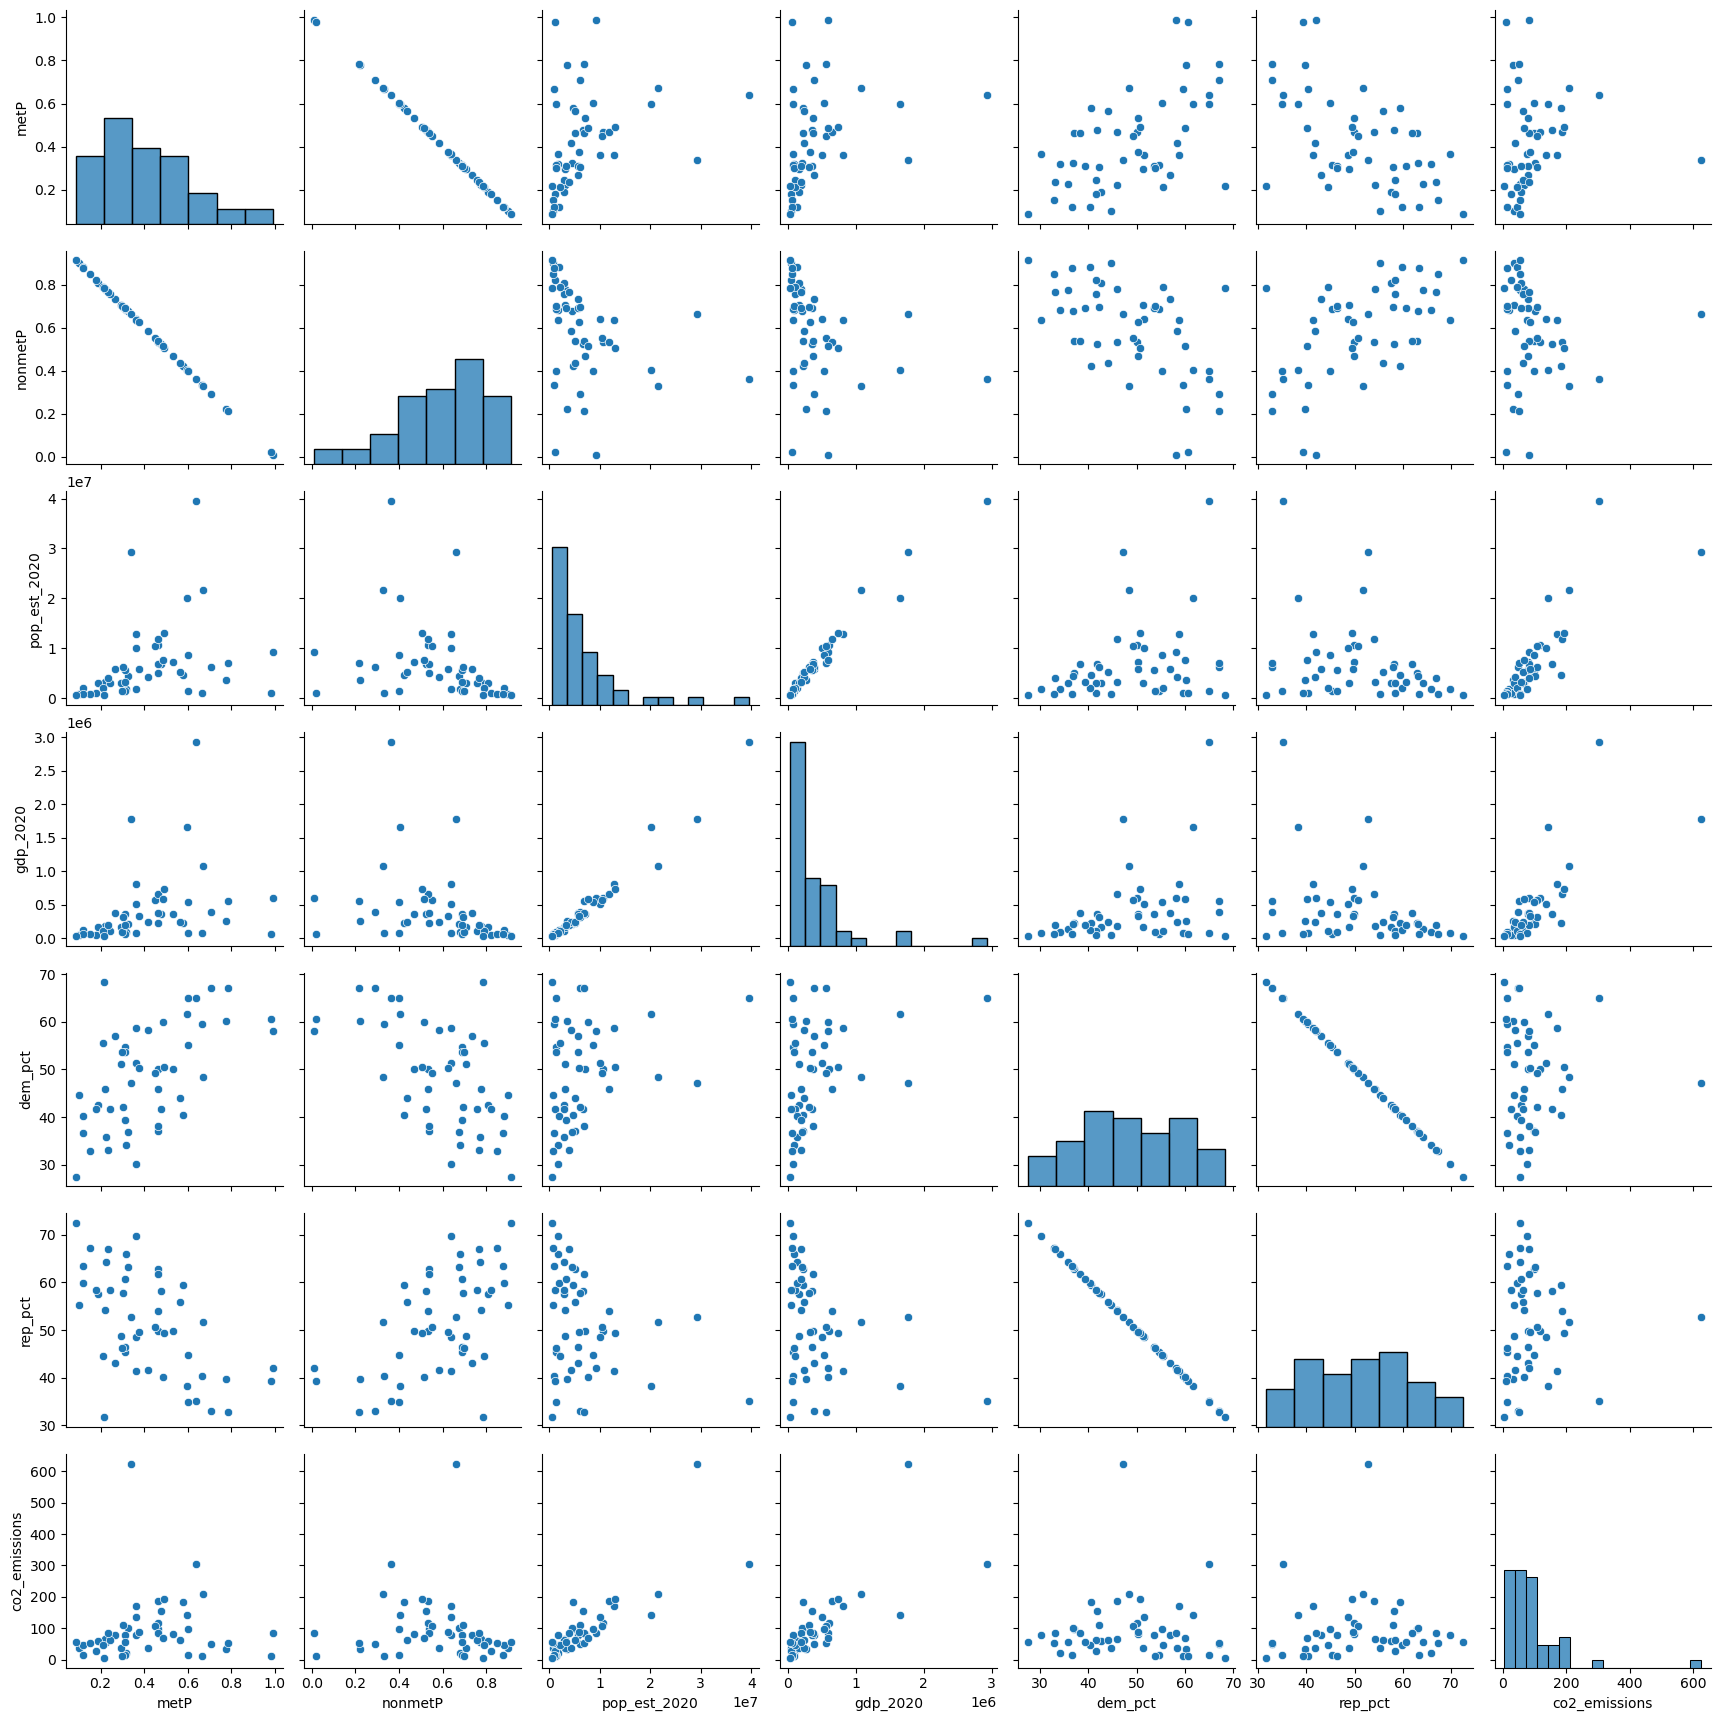

In [26]:
# Pairplot
sns.pairplot(merged_df1[['metP', 'nonmetP', 'pop_est_2020', 'gdp_2020', 'dem_pct', 'rep_pct', 'co2_emissions']])
plt.savefig("/Users/madisonfusaro/Desktop/School/MATH 358/pairplot_merged_df1.png") # save the plot
plt.show()

Mean Squared Error: 1613.22099415673
R-squared: 0.31245004322126924


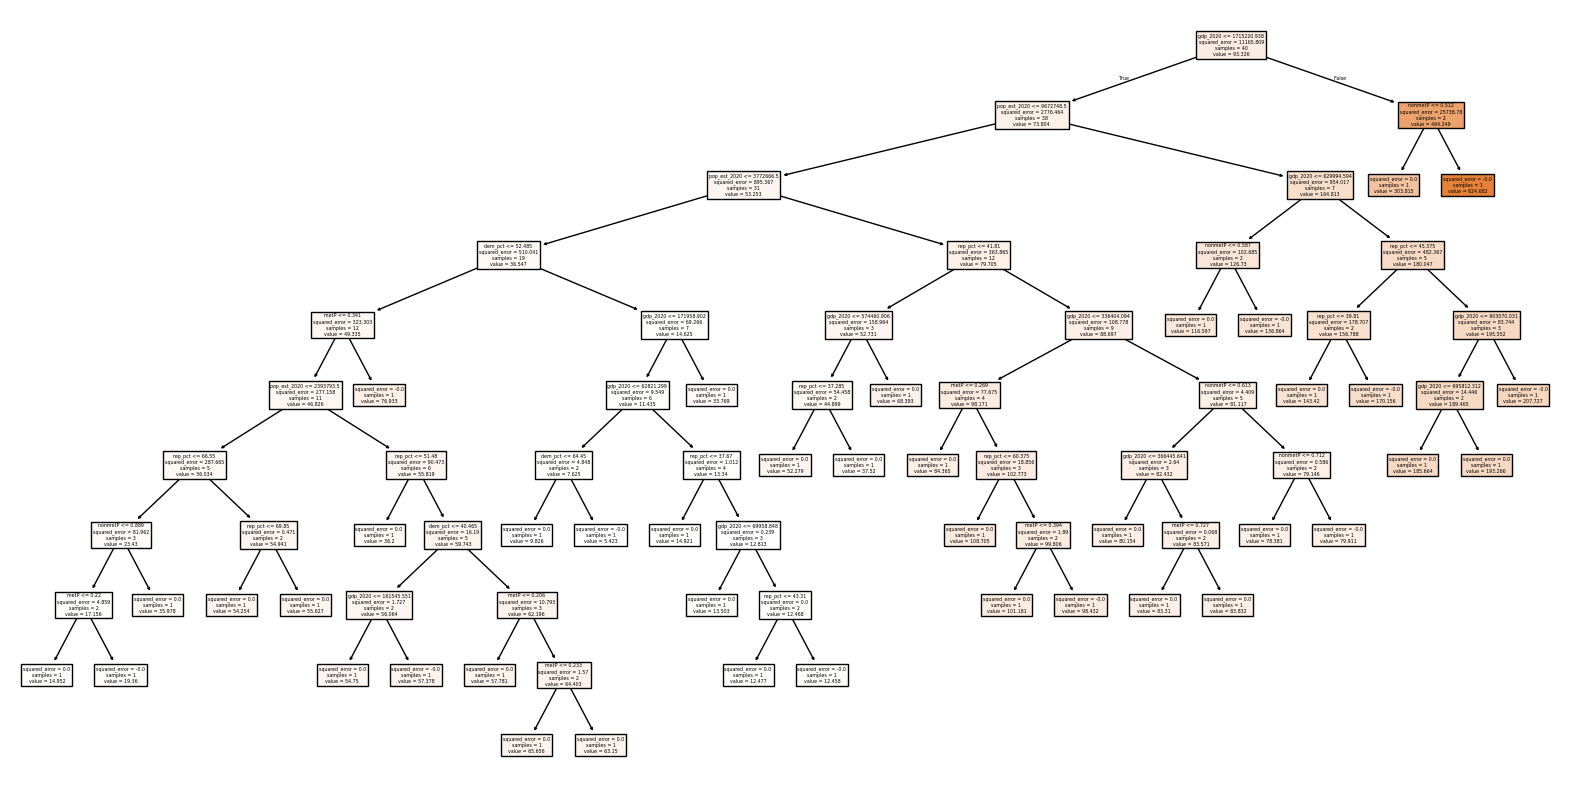

In [27]:
## Decision tree with all predictors

# Prepare the data
X = merged_df1[["gdp_2020", "pop_est_2020", "dem_pct", "rep_pct", "metP", "nonmetP"]]  # Feature columns
y = merged_df1["co2_emissions"]  # Target column (carbon emissions)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R^2
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, class_names=["co2_emissions"])
plt.show()

- decision tree is likely overfitting the training data or failing to capture complex patterns
- maybe too many predictors

Mean Squared Error: 1640.4879685457552
R-squared: 0.30082894038999797


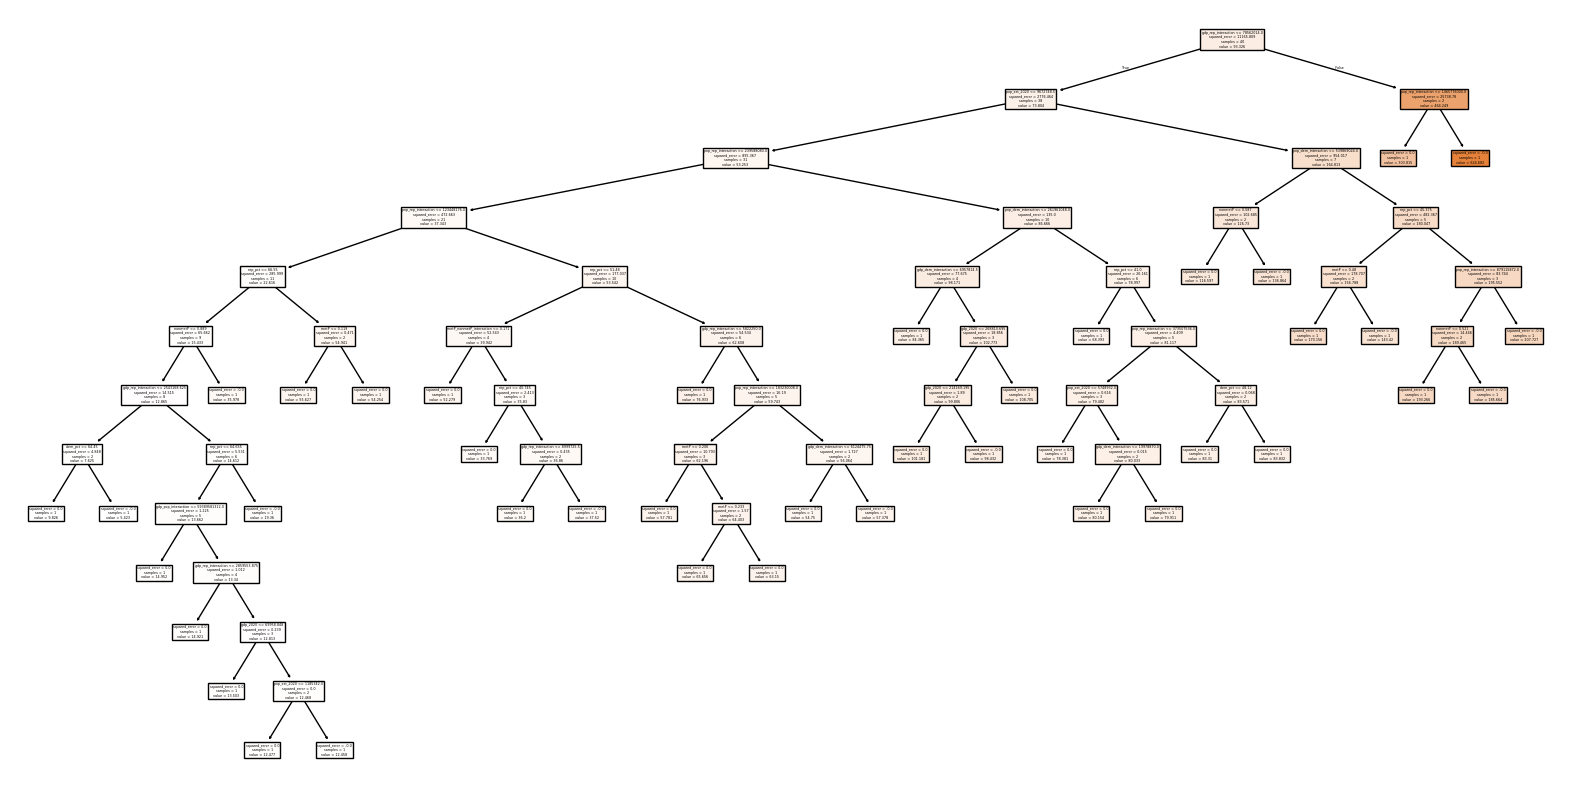

In [28]:
## Adding interaction terms for decision tree with all predictors 

# Create interaction terms
merged_df1["gdp_pop_interaction"] = merged_df1["gdp_2020"] * merged_df1["pop_est_2020"]
merged_df1["gdp_dem_interaction"] = merged_df1["gdp_2020"] * merged_df1["dem_pct"]
merged_df1["gdp_rep_interaction"] = merged_df1["gdp_2020"] * merged_df1["rep_pct"]
merged_df1["pop_dem_interaction"] = merged_df1["pop_est_2020"] * merged_df1["dem_pct"]
merged_df1["pop_rep_interaction"] = merged_df1["pop_est_2020"] * merged_df1["rep_pct"]
merged_df1["metP_nonmetP_interaction"] = merged_df1["metP"] * merged_df1["nonmetP"]

# Prepare the data
X = merged_df1[["gdp_2020", "pop_est_2020", "dem_pct", "rep_pct", "metP", "nonmetP", 
                "gdp_pop_interaction", "gdp_dem_interaction", "gdp_rep_interaction", 
                "pop_dem_interaction", "pop_rep_interaction", "metP_nonmetP_interaction"]]  # Feature columns
y = merged_df1["co2_emissions"]  # Target column (carbon emissions)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R^2
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, class_names=["co2_emissions"])
plt.show()

- output did not improve the model, actually slightly worsened it

In [29]:
## Best combination of model paramters using grid search and CV

# Set up parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Set up grid search
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters:", grid_search.best_params_)

# Get the best model from grid search
best_dt_regressor = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_dt_regressor.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the MSE and R^2 of the best model
print(f"Best Mean Squared Error: {mse_best}")
print(f"Best R-squared: {r2_best}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Mean Squared Error: 1301.5670892712346
Best R-squared: 0.44527600420868696


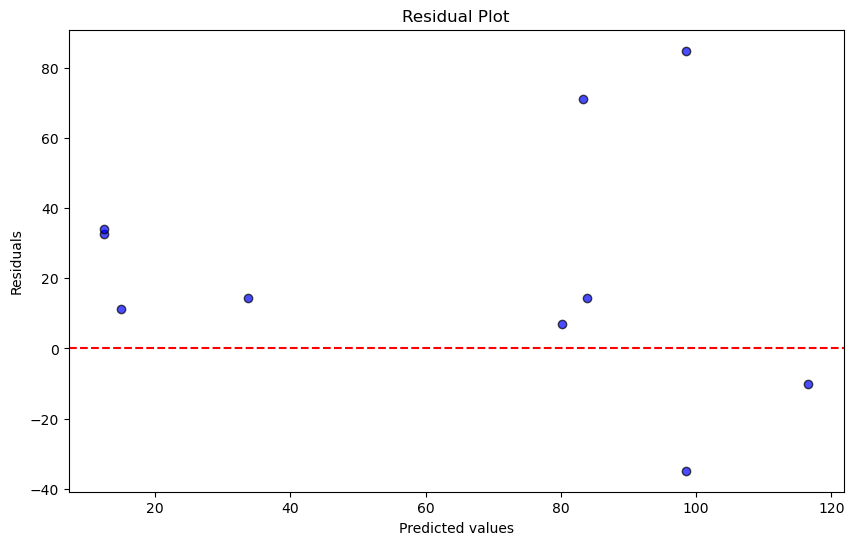

In [30]:
## Residual Plot for best descision tree model

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [31]:
## Log transformations of the variables

# Log-transform GDP and CO2 emissions (avoiding log(0) by adding a small constant)
merged_df1['log_gdp_2020'] = np.log(merged_df1['gdp_2020'] + 1)  
merged_df1['log_co2_emissions'] = np.log(merged_df1['co2_emissions'] + 1)  

# Create emissions per capita (co2_emissions per person)
merged_df1['co2_per_capita'] = merged_df1['co2_emissions'] / merged_df1['pop_est_2020']

# Normalize the metro and non-metro population percentages (metP and nonmetP)
scaler = StandardScaler()
merged_df1[['metP', 'nonmetP']] = scaler.fit_transform(merged_df1[['metP', 'nonmetP']])

# Normalize the other continuous variables like population and GDP
merged_df1[['pop_est_2020', 'gdp_2020']] = scaler.fit_transform(merged_df1[['pop_est_2020', 'gdp_2020']])

# Log-transform the political percentage variables (optional but could improve model)
merged_df1['log_rep_pct'] = np.log(merged_df1['rep_pct'] + 1)
merged_df1['log_dem_pct'] = np.log(merged_df1['dem_pct'] + 1)

# Check the transformations
merged_df1.head()

,state,metP,nonmetP,pop_est_2020,est_base_2020,gdp_2020,year_x,dem_pct,rep_pct,year_y,...,gdp_dem_interaction,gdp_rep_interaction,pop_dem_interaction,pop_rep_interaction,metP_nonmetP_interaction,log_gdp_2020,log_co2_emissions,co2_per_capita,log_rep_pct,log_dem_pct
0,Alabama,0.226657,-0.226657,-0.215246,5025369,-0.346779,2020,37.09,62.91,2020,...,8.244692e+06,1.398419e+07,1.866775e+08,3.166319e+08,0.248608,12.311737,4.599472,0.000020,4.157476,3.639952
1,Alaska,-1.473048,1.473048,-0.799189,733395,-0.682373,2020,44.74,55.26,2020,...,2.251889e+06,2.781391e+06,3.279518e+07,4.050652e+07,0.090000,10.826432,3.610316,0.000049,4.029984,3.822973
2,Arizona,0.557738,-0.557738,0.077269,7158110,-0.068207,2020,50.16,49.84,2020,...,1.830979e+07,1.819298e+07,3.605067e+08,3.582068e+08,0.248889,12.807731,4.396347,0.000011,3.928683,3.934958
3,Arkansas,-0.879433,0.879433,-0.489361,3011553,-0.530130,2020,35.79,64.21,2020,...,4.593321e+06,8.240769e+06,1.078906e+08,1.935640e+08,0.175289,11.762453,4.020871,0.000018,4.177613,3.605226
4,California,1.047928,-1.047928,4.468282,39555674,4.944133,2020,64.91,35.09,2020,...,1.904018e+08,1.029302e+08,2.565370e+09,1.386826e+09,0.230975,14.891646,5.719707,0.000008,3.586016,4.188290


Mean Squared Error: 1659.4716926169117
R-squared: 0.2927381340392874


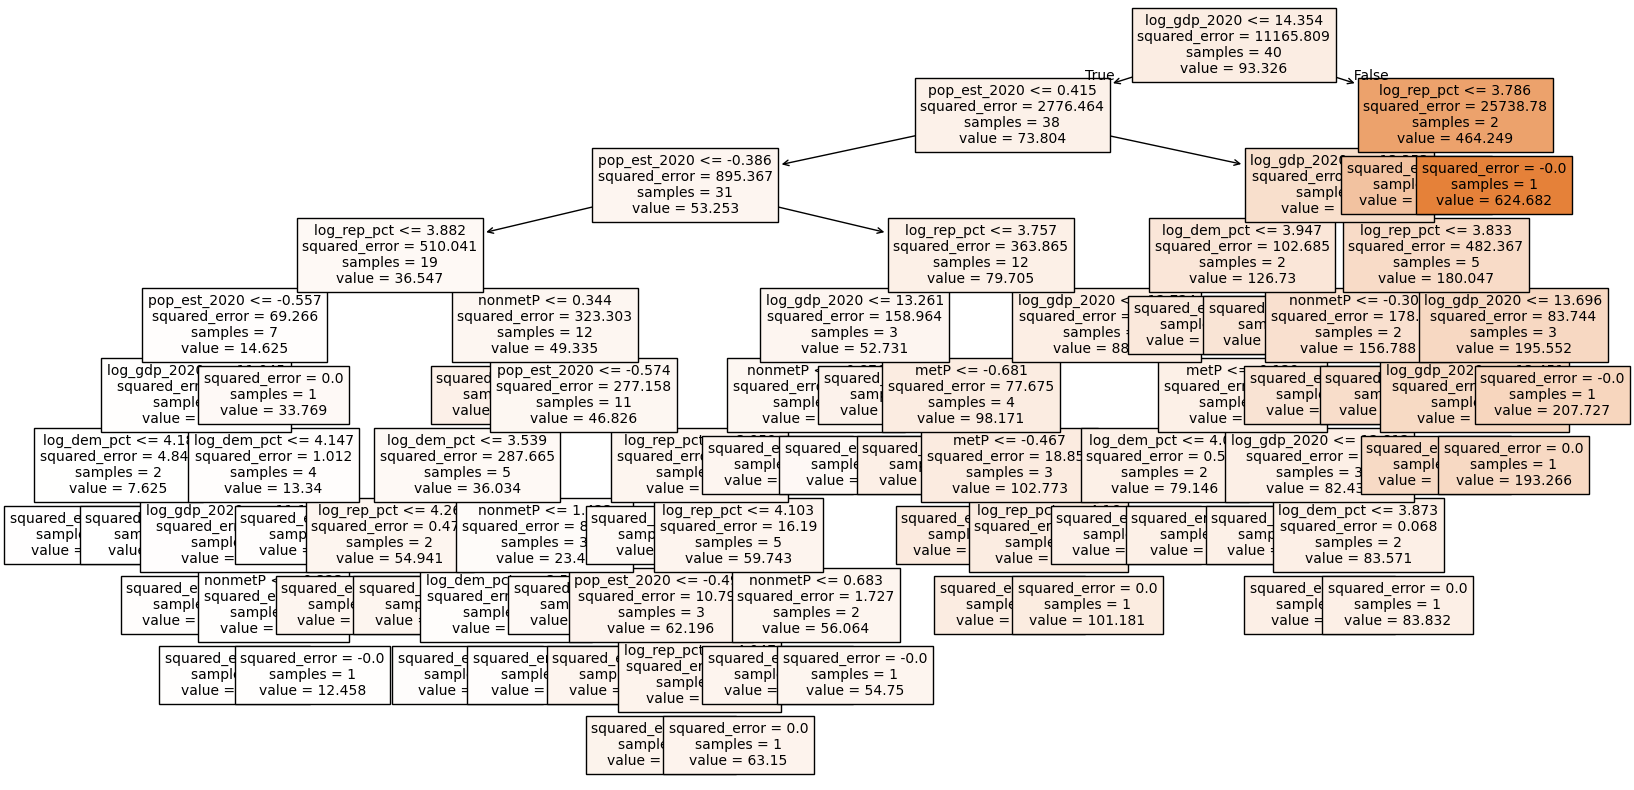

In [32]:
## Decision tree with log transformation features

# Prepare features and target variable
X = merged_df1[['log_gdp_2020', 'pop_est_2020', 'metP', 'nonmetP', 'log_rep_pct', 'log_dem_pct']]
y = merged_df1['co2_emissions']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R^2
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

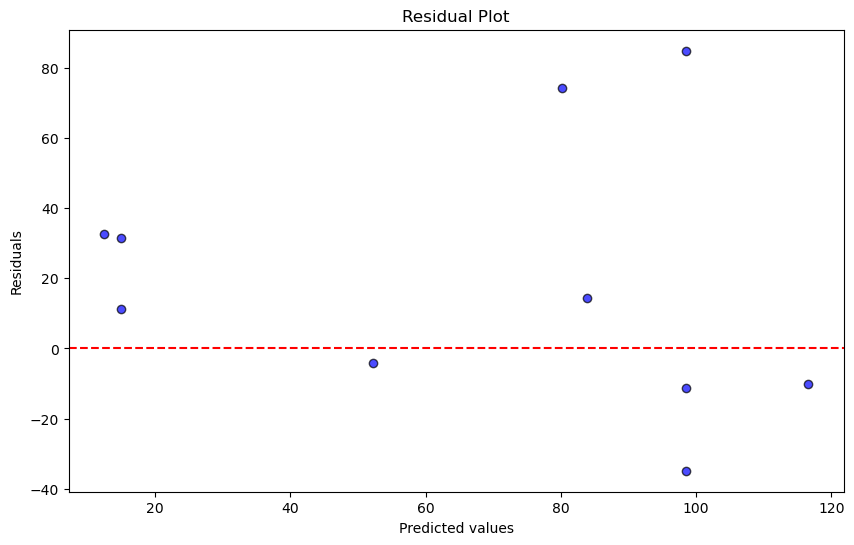

In [33]:
## Residual Plot for log-transformation

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [34]:
## Try out some new random forest models using log-transformation variables

# Setup parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print MSE and R^2 
print(f"Random Forest Best Mean Squared Error: {mse_rf}")
print(f"Random Forest Best R-squared: {r2_rf}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best Mean Squared Error: 1657.1433811274742
Random Forest Best R-squared: 0.2937304534237538


In [35]:
## Try new interaction terms with random forest

# Create new interaction terms
merged_df1["dem_log_gdp_interaction"] = merged_df1["dem_pct"] * merged_df1["log_gdp_2020"]
merged_df1["rep_log_gdp_interaction"] = merged_df1["rep_pct"] * merged_df1["log_gdp_2020"]
merged_df1["dem_pop_interaction"] = merged_df1["dem_pct"] * merged_df1["pop_est_2020"]
merged_df1["rep_pop_interaction"] = merged_df1["rep_pct"] * merged_df1["pop_est_2020"]
merged_df1["met_log_gdp_interaction"] = merged_df1["metP"] * merged_df1["log_gdp_2020"]
merged_df1["nonmet_log_gdp_interaction"] = merged_df1["nonmetP"] * merged_df1["log_gdp_2020"]
merged_df1["met_dem_interaction"] = merged_df1["metP"] * merged_df1["dem_pct"]
merged_df1["nonmet_rep_interaction"] = merged_df1["nonmetP"] * merged_df1["rep_pct"]

# Define feature matrix X and target vector y
X = merged_df1[[
    'log_gdp_2020', 'metP', 'nonmetP',
    'dem_pct', 'rep_pct',
    'dem_log_gdp_interaction', 'rep_log_gdp_interaction',
    'dem_pop_interaction', 'rep_pop_interaction',
    'met_log_gdp_interaction', 'nonmet_log_gdp_interaction',
    'met_dem_interaction', 'nonmet_rep_interaction'
]]
y = merged_df1['co2_emissions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit random forest with best-known parameters
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print MSE and R^2
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 1621.962338074487
R-squared: 0.30872450862023737


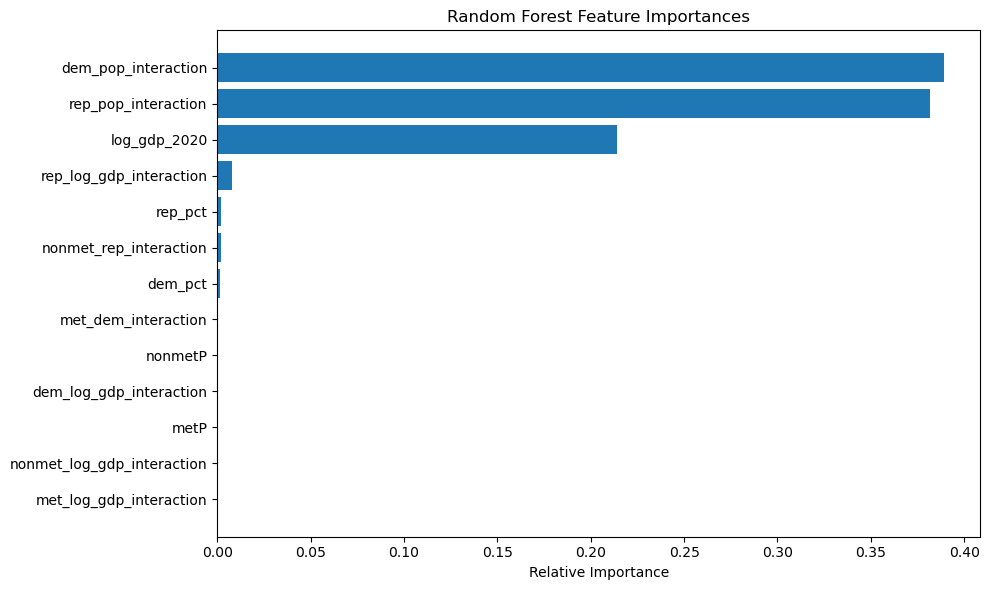

In [36]:
# Get feature importances and sort them
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns  # Make sure X matches your current model input

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

In [37]:
## Random forest with single-feature (top feature) model

# Prepare data
X_simple = merged_df1[['dem_pop_interaction']]
y = merged_df1['co2_emissions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Initialize and train model
rf_simple = RandomForestRegressor(random_state=42)
rf_simple.fit(X_train, y_train)

# Predictions
y_pred_simple = rf_simple.predict(X_test)

# Evaluation
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

# Print MSE and R^2
print(f"Single-Feature Model - Mean Squared Error: {mse_simple}")
print(f"Single-Feature Model - R-squared: {r2_simple}")

Single-Feature Model - Mean Squared Error: 1846.7562289322595
Single-Feature Model - R-squared: 0.2129180255015528


In [38]:
## Randon forest with top four features based on feature importance

# Selecting features based on importance 
X_refined = merged_df1[['dem_pop_interaction', 'rep_pop_interaction', 'log_gdp_2020', 'rep_log_gdp_interaction']]

# Target variable
y = merged_df1['co2_emissions']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_refined, y, test_size=0.2, random_state=42)

# Setup parameter grid for Random Forest tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print MSE and R^2
print(f"Random Forest Best Mean Squared Error: {mse_rf}")
print(f"Random Forest Best R-squared: {r2_rf}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best Mean Squared Error: 1645.7499657052329
Random Forest Best R-squared: 0.29858629295813766


## Unsupervised methods 

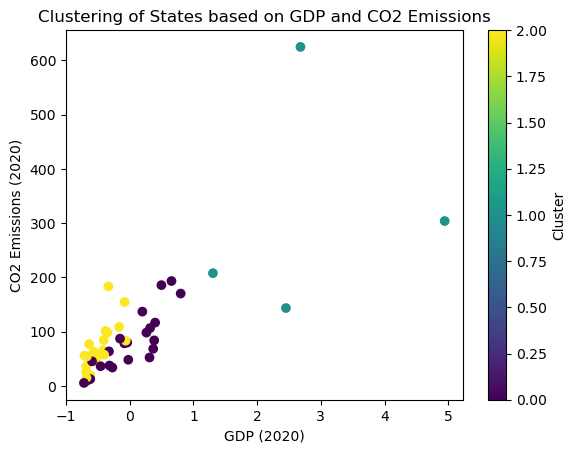

             state  Cluster
34            Ohio        0
27          Nevada        0
37    Pennsylvania        0
38    Rhode Island        0
48       Wisconsin        0
39  South Carolina        0
22       Minnesota        0
21        Michigan        0
20   Massachusetts        0
19        Maryland        0
18           Maine        0
36          Oregon        0
30      New Mexico        0
28   New Hampshire        0
29      New Jersey        0
12        Illinois        0
45        Virginia        0
10          Hawaii        0
9          Georgia        0
7         Delaware        0
6      Connecticut        0
5         Colorado        0
46      Washington        0
2          Arizona        0
32  North Carolina        0
44         Vermont        0
42           Texas        1
8          Florida        1
4       California        1
31        New York        1
0          Alabama        2
43            Utah        2
47   West Virginia        2
41       Tennessee        2
40    South Dakota  

In [39]:
## K-means clustering

# Prepare the data
X = merged_df1[["gdp_2020", "pop_est_2020", "dem_pct", "rep_pct", "metP", "nonmetP"]]  # Feature columns
y = merged_df1["co2_emissions"]  # Target column (CO2 emissions)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can experiment with different k values
merged_df1['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (for simplicity, plot GDP vs CO2 emissions)
plt.scatter(merged_df1['gdp_2020'], merged_df1['co2_emissions'], c=merged_df1['Cluster'], cmap='viridis')
plt.xlabel('GDP (2020)')
plt.ylabel('CO2 Emissions (2020)')
plt.title('Clustering of States based on GDP and CO2 Emissions')
plt.colorbar(label='Cluster')
plt.show()

# Inspect the clusters
print(merged_df1[['state', 'Cluster']].sort_values(by='Cluster'))

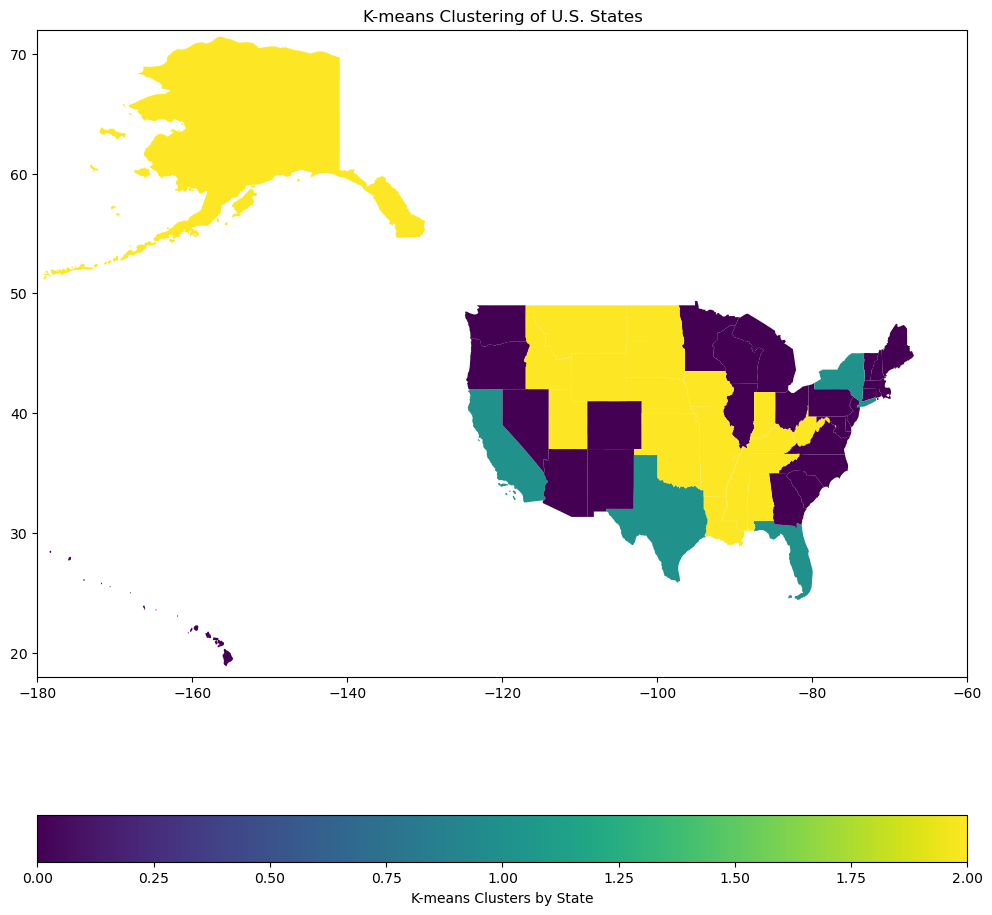

In [40]:
## Visualize on US map

# U.S. state boundaries
shapefile = "/Users/madisonfusaro/Desktop/School/MATH 358/tl_2021_us_state.zip" 
gdf = gpd.read_file(shapefile)

# Rename the 'NAME' column to 'state' in the GeoDataFrame
gdf = gdf.rename(columns={"NAME": "state"})

# Merge the shapefile with k-means cluster data 
gdf = gdf.merge(merged_df1[['state', 'Cluster']], on="state", how="left")

# Plot the map with k-means clusters
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the k-means clusters
gdf.plot(column='Cluster', ax=ax, legend=True, 
         legend_kwds={'label': "K-means Clusters by State",
                      'orientation': "horizontal"},
         cmap='viridis')  # You can use a different colormap if desired

# Customize the plot
ax.set_title("K-means Clustering of U.S. States")
ax.set_aspect('auto')
ax.set_xlim([-180, -60])
ax.set_ylim([18, 72])

plt.savefig("/Users/madisonfusaro/Desktop/School/MATH 358/k-means_StatesMap.png") # save the plot

# Show the plot
plt.show()

In [41]:
# Calculate the mean of the features for each cluster
cluster_means = merged_df1.groupby('Cluster')[['gdp_2020', 'pop_est_2020', 'dem_pct', 'rep_pct', 'metP', 'nonmetP']].mean()
cluster_means

,gdp_2020,pop_est_2020,dem_pct,rep_pct,metP,nonmetP
Cluster,,,,,,
0,-0.078280,-0.076841,55.987692,44.012308,0.400520,-0.400520
1,2.846255,2.851295,55.527500,44.472500,0.688485,-0.688485
2,-0.467487,-0.470365,38.121000,61.879000,-0.658374,0.658374


**Cluster 0 (Moderate Characteristics):**
- GDP: Slightly below average (indicated by the negative values for both GDP and population), suggesting states in this cluster have moderate economic activity.
- Population: Slightly below average.
- Democratic Percentage: Approximately 56% of the population in these states tends to lean Democratic.
- Republican Percentage: Approximately 44% of the population in these states tends to lean Republican.
- Urban/Rural (metP vs nonmetP): These states are relatively balanced in terms of urban vs rural, with a slight leaning towards urban areas (metP = 0.4, nonmetP = -0.4).

**Cluster 1 (High GDP and Population, Balanced Political Leaning):**
- GDP: High, indicating these states have strong economic performance.
- Population: High as well, suggesting large, populous states.
- Democratic Percentage: Slightly more Democratic leaning than Republican, with around 55.5% voting Democratic and 44.5% voting Republican.
- Urban/Rural: These states are more urbanized, with higher metP values (0.69) and lower nonmetP values (-0.69), indicating a strong urban presence.

**Cluster 2 (Low Democratic Percentage, Rural Leaning):**
- GDP: Significantly lower than average (indicating states with lower economic activity).
- Population: Similarly low, suggesting smaller, less populated states.
- Democratic Percentage: Very low (about 38%), indicating that these states tend to lean more Republican.
- Republican Percentage: High (about 62%), showing a stronger Republican presence.
- Urban/Rural: These states are heavily rural, as indicated by the negative metP value (-0.66) and positive nonmetP value (0.66), suggesting a larger rural population.

**Summary:**
- Cluster 0: States that are moderately developed, with balanced political leanings and a mix of urban and rural populations.
- Cluster 1: Large, highly developed, urbanized states with a more balanced political landscape.
- Cluster 2: Smaller, less developed, rural states with a strong Republican presence.

In [42]:
# Calculate the mean CO2 emissions for each cluster
cluster_co2_means = merged_df1.groupby('Cluster')['co2_emissions'].mean()
cluster_co2_means

Cluster
0     71.933912
1    319.911129
2     72.119469
Name: co2_emissions, dtype: float64

Based on the mean CO2 emissions by cluster:
- Cluster 0: 71.93 (moderate emissions)
- Cluster 1: 319.91 (high emissions)
- Cluster 2: 72.12 (moderate emissions)

These results show that Cluster 1, which consists of states with high GDP, high population, and urban characteristics, has significantly higher CO2 emissions compared to Clusters 0 and 2, which have moderate emissions. This finding supports the hypothesis that states with higher GDP and urbanization tend to have higher CO2 emissions. Clusters 0 and 2, which represent states with more moderate or rural characteristics, have similar and lower emissions.

In [43]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_scaled, y)  # X_scaled is your standardized feature data, y is the CO2 emissions
print(f"Coefficients: {model.coef_}")

Coefficients: [-117.41381079  201.44308667   -5.94646501    5.94646501   -4.89290624
    4.89290624]


Interpretation of Coefficients:
- GDP (negative coefficient): A negative coefficient for GDP suggests that as GDP increases, CO2 emissions decrease, which is somewhat counterintuitive because one would expect higher GDP to correlate with higher emissions. However, this could be influenced by other factors like the type of industries in wealthier states or the energy mix.
- Population (positive coefficient): A positive coefficient for population indicates that larger populations contribute to higher CO2 emissions, which makes sense since more people often mean more consumption, transportation, and industrial activity.
- Political Affiliation:
    - Democratic percentage (negative): A negative coefficient for the Democratic percentage suggests that more Democratic-leaning states tend to have lower CO2 emissions, which could be due to stronger environmental regulations and policies aimed at reducing emissions.
    - Republican percentage (positive): A positive coefficient for the Republican percentage indicates that more Republican-leaning states have higher CO2 emissions, possibly because these states may have fewer environmental regulations or less aggressive climate policies.
- Urbanization (metP):
    - Urban areas (negative coefficient): The negative coefficient for metP (urban) suggests that urban areas are associated with lower emissions, which seems unusual since urban areas typically have higher emissions due to more vehicles, industries, and energy consumption. This could be due to the type of urbanization or the sources of energy used in urban areas.
- Rural areas (nonmetP): Conversely, the positive coefficient for nonmetP (rural) suggests that rural areas may have higher emissions, possibly due to reliance on less efficient transportation, older infrastructure, and other factors contributing to higher carbon footprints in rural regions.